In [6]:
import numpy as np


ba=np.load('/home/maria/LuckyMouse4/data/brain_area.npy',allow_pickle=True)
ba

array(['VISp', 'VISp', 'VISp', ..., 'VISpm', 'VISpm', 'VISpm'],
      shape=(39209,), dtype=object)

Loaded 39209 neurons across 6 areas


/tmp/ipykernel_2519805/170106434.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index, rotation=45, ha="right")


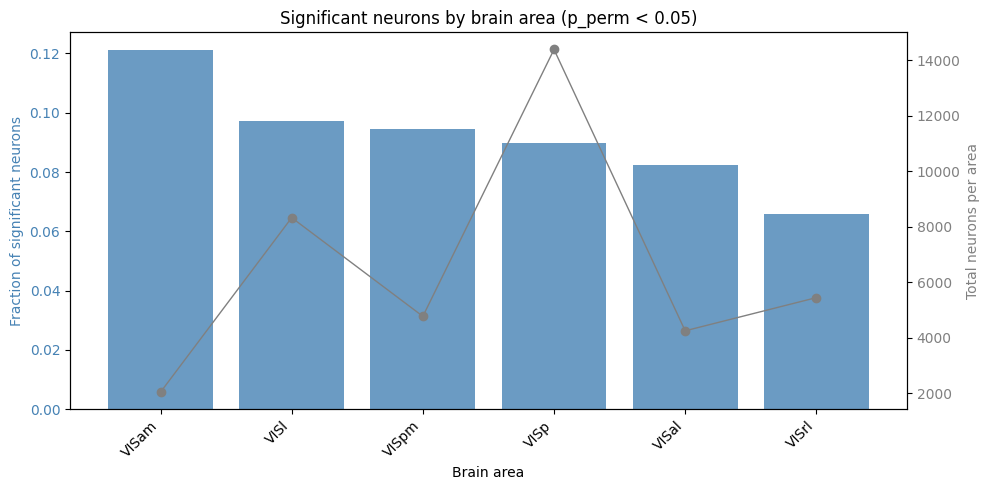

In [7]:
#!/usr/bin/env python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# Paths
# -------------------------------------------------------
CSV_PATH = '/home/maria/MITNeuralComputation/statistical_test/corr_pc1_perm.csv'
BRAIN_PATH = '/home/maria/LuckyMouse4/data/brain_area.npy'

# -------------------------------------------------------
# Load data
# -------------------------------------------------------
df = pd.read_csv(CSV_PATH)
areas = np.load(BRAIN_PATH, allow_pickle=True)

assert len(df) == len(areas), \
    f"Length mismatch: {len(df)} results vs {len(areas)} areas"

df["brain_area"] = areas
print("Loaded", len(df), "neurons across",
      df["brain_area"].nunique(), "areas")

# -------------------------------------------------------
# Define significance threshold
# -------------------------------------------------------
alpha = 0.05
df["is_sig"] = df["p_perm"] < alpha

# -------------------------------------------------------
# Count per area
# -------------------------------------------------------
counts = (
    df.groupby("brain_area")["is_sig"]
      .agg(["sum", "count"])
      .rename(columns={"sum": "n_sig", "count": "n_total"})
)
counts["frac_sig"] = counts["n_sig"] / counts["n_total"]

# Sort by fraction
counts = counts.sort_values("frac_sig", ascending=False)

# -------------------------------------------------------
# Plot
# -------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(10,5))

bars = ax1.bar(counts.index, counts["frac_sig"],
               color="steelblue", alpha=0.8, label="Fraction significant")
ax1.set_ylabel("Fraction of significant neurons", color="steelblue")
ax1.set_xlabel("Brain area")
ax1.set_xticklabels(counts.index, rotation=45, ha="right")
ax1.tick_params(axis='y', labelcolor="steelblue")

# Second y-axis: total count
ax2 = ax1.twinx()
ax2.plot(counts.index, counts["n_total"], color="gray", marker="o",
         label="Total neurons", linewidth=1)
ax2.set_ylabel("Total neurons per area", color="gray")
ax2.tick_params(axis='y', labelcolor="gray")

# Title + legend
plt.title(f"Significant neurons by brain area (p_perm < {alpha})")
fig.tight_layout()
plt.show()
